# DATASETS OVERVIEW

In [ ]:
# Libraries
import seaborn as sns
import numpy as np
from pathlib import Path
import sys
import pandas as pd

# Add /Source to sys.path if not already present
project_root = Path.cwd().parent
source_path = project_root / "src"

if source_path.exists() and str(source_path) not in sys.path:
    sys.path.insert(0, str(source_path))

# Utility functions
from calcium_activity_characterization.analysis.visualizers import (
    plot_histogram_by_dataset, 
    plot_pie_chart_by_dataset, 
    visualize_image,
    plot_bar_by_dataset,
    plot_histogram_by_group,
    plot_scatter_size_coded,
    plot_scatter_hexbin
    )
from calcium_activity_characterization.analysis.loaders import load_dataset

sns.set(style="whitegrid")

# Define paths to control datasets
path = "D:/Mateo/Results"

# Load and merge datasets
peaks = load_dataset(path=path, file_name="merged_peaks.csv")
cells = load_dataset(path=path, file_name="merged_cells.csv")
events = load_dataset(path=path, file_name="merged_events.csv")
communications = load_dataset(path=path, file_name="merged_communications.csv")
experiments = load_dataset(path=path, file_name="experiments.csv")

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\loaders.py:34: DtypeWarning: Columns (29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{path}/{file_name}")
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\loaders.py:34: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{path}/{file_name}")
c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\loaders.py:34: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(f"{path}/{file_name}")


## Experiments nomenclature & available datasets

In [24]:
display(experiments[experiments["condition"] != "unuseful"])

,path,date,image_sequence,experiment_type,condition,confluency,concentration,time,dataset
0,D:/Mateo/20250326/Output/IS1,20250326,IS1,spontaneous,control - 1st run,1200000,NaN,NaN,20250326__IS1__spontaneous__control - 1st run_...
1,D:/Mateo/20250326/Output/IS2,20250326,IS2,spontaneous,control - 2nd run,1200000,NaN,NaN,20250326__IS2__spontaneous__control - 2nd run_...
2,D:/Mateo/20250326/Output/IS3,20250326,IS3,spontaneous,control - 1st run,1200000,NaN,NaN,20250326__IS3__spontaneous__control - 1st run_...
3,D:/Mateo/20250326/Output/IS4,20250326,IS4,spontaneous,control - 2nd run,1200000,NaN,NaN,20250326__IS4__spontaneous__control - 2nd run_...
4,D:/Mateo/20250404/Output/IS1,20250404,IS1,spontaneous,control - 1st run,1200000,NaN,NaN,20250404__IS1__spontaneous__control - 1st run_...
5,D:/Mateo/20250404/Output/IS2,20250404,IS2,spontaneous,control - 2nd run,1200000,NaN,NaN,20250404__IS2__spontaneous__control - 2nd run_...
6,D:/Mateo/20250404/Output/IS3,20250404,IS3,spontaneous,control - 1st run,1200000,NaN,NaN,20250404__IS3__spontaneous__control - 1st run_...
7,D:/Mateo/20250404/Output/IS4,20250404,IS4,spontaneous,control - 2nd run,1200000,NaN,NaN,20250404__IS4__spontaneous__control - 2nd run_...
9,D:/Mateo/20250409/Output/IS01,20250409,IS01,spontaneous,control - 1st run,600000,NaN,NaN,20250409__IS01__spontaneous__control - 1st run...
10,D:/Mateo/20250409/Output/IS02,20250409,IS02,spontaneous,control - 2nd run,600000,NaN,NaN,20250409__IS02__spontaneous__control - 2nd run...


In [25]:
control_confluency_counts = experiments[experiments["condition"] == "control - 1st run"]["confluency"].value_counts()
print("Confluency count for controls:\n", control_confluency_counts)

Confluency count for controls:
 confluency
1200000    7
600000     3
120000     2
1000000    2
Name: count, dtype: int64


In [26]:
cells_counts_per_experiment = cells[cells["condition"]=="control - 1st run"].groupby(["confluency","dataset"])["Cell ID"].count()
print(f"Cells counts per experiment:\n{cells_counts_per_experiment}")

Cells counts per experiment:
confluency  dataset                                                   
120000      20250409__IS05__spontaneous__control - 1st run__None__None     203
            20250409__IS07__spontaneous__control - 1st run__None__None     197
600000      20250409__IS01__spontaneous__control - 1st run__None__None     463
            20250409__IS03__spontaneous__control - 1st run__None__None     485
            20250416__IS4__spontaneous__control - 1st run__None__None      876
1000000     20250624__IS01__spontaneous__control - 1st run__None__None     704
            20250624__IS03__spontaneous__control - 1st run__None__None     562
1200000     20250326__IS1__spontaneous__control - 1st run__None__None     1074
            20250326__IS3__spontaneous__control - 1st run__None__None      985
            20250404__IS1__spontaneous__control - 1st run__None__None     1234
            20250404__IS3__spontaneous__control - 1st run__None__None      814
            20250409__IS09__spo

In [27]:
global_events_counts_per_experiment = events[(events["condition"]=="control - 1st run") & 
                                             (events["Event type"]=="GlobalEvent")
                                             ].groupby(["confluency","dataset"])["Event ID"].count()
print(f"Global events counts per experiment:\n{global_events_counts_per_experiment}")

Global events counts per experiment:
confluency  dataset                                                   
120000      20250409__IS05__spontaneous__control - 1st run__None__None    2
            20250409__IS07__spontaneous__control - 1st run__None__None    1
600000      20250409__IS01__spontaneous__control - 1st run__None__None    1
            20250416__IS4__spontaneous__control - 1st run__None__None     4
1000000     20250624__IS01__spontaneous__control - 1st run__None__None    4
            20250624__IS03__spontaneous__control - 1st run__None__None    2
1200000     20250326__IS1__spontaneous__control - 1st run__None__None     5
            20250326__IS3__spontaneous__control - 1st run__None__None     4
            20250404__IS1__spontaneous__control - 1st run__None__None     5
            20250404__IS3__spontaneous__control - 1st run__None__None     2
            20250409__IS09__spontaneous__control - 1st run__None__None    4
            20250409__IS11__spontaneous__control - 1st r

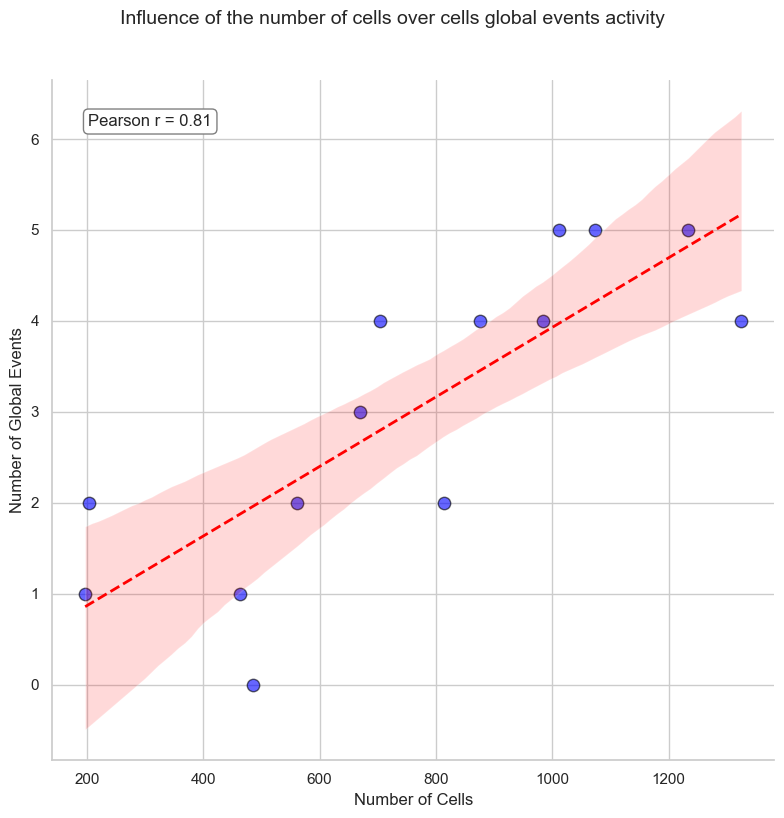

In [ ]:
cells_counts = cells.groupby("dataset")["Cell ID"].count()

global_events_counts = events[events["Event type"]=="GlobalEvent"].groupby("dataset")["Event ID"].count()

experiments["Number of cells"] = experiments["dataset"].map(cells_counts)
experiments["Number of global events"] = experiments["dataset"].map(global_events_counts)

experiments["Number of global events"] = experiments["Number of global events"].fillna(0).astype(int)

control_experiments = experiments[experiments["condition"] == "control - 1st run"]

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Compute Pearson correlation
corr = control_experiments["Number of cells"].corr(
    control_experiments["Number of global events"], method="pearson"
)

# Create the plot
g = sns.lmplot(
    data=control_experiments,
    x="Number of cells",
    y="Number of global events",
    hue=None,
    height=8,
    aspect=1,
    ci=95,
    robust=False,
    order=1,  # change to 2 for quadratic fit
    truncate=True,
    scatter_kws={"alpha": 0.6, "s": 80, "color": "blue", "edgecolor": "black"},
    line_kws={"color": "red", "linewidth": 2, "linestyle": "--"},
    markers="o",
    palette="muted"
)

# Annotate Pearson r
g.ax.text(
    0.05, 0.95,
    f"Pearson r = {corr:.2f}",
    transform=g.ax.transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white')
)

# Customize labels and title
g.set_axis_labels("Number of Cells", "Number of Global Events")
g.fig.suptitle("Influence of the number of cells over cells global events activity", fontsize=14, y=1.02)

# Optional: Customize axes limits
# g.set(xlim=(0, 1000), ylim=(0, 100))

plt.tight_layout()
plt.show()